In [1]:
%matplotlib inline
%load_ext autoreload

# Example: AR process

First, lets generate some data from an AR process and plot it.

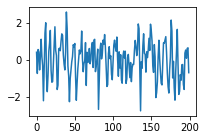

In [2]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(1234)
ar = np.array([1, -0.7, 0.4])
ma = np.array([1])
ar_simulater = ArmaProcess(ar, ma)
data = ar_simulater.generate_sample(nsample=200)
data = data - np.mean(data)
data = data / np.std(data)

fig = plt.figure(figsize=(3, 2))
plt.plot(data);

In [8]:
from pspline_psd.sample.gibbs_pspline_simple import gibbs_pspline_simple

mcmc = gibbs_pspline_simple(
    data=data, Ntotal=200, burnin=100, degree=3, eqSpacedKnots=True, compute_psds=True
)

MCMC sampling:   0%|          | 0/200 [00:00<?, ?it/s]

Generating PSD posterior:   0%|          | 0/100 [00:00<?, ?it/s]

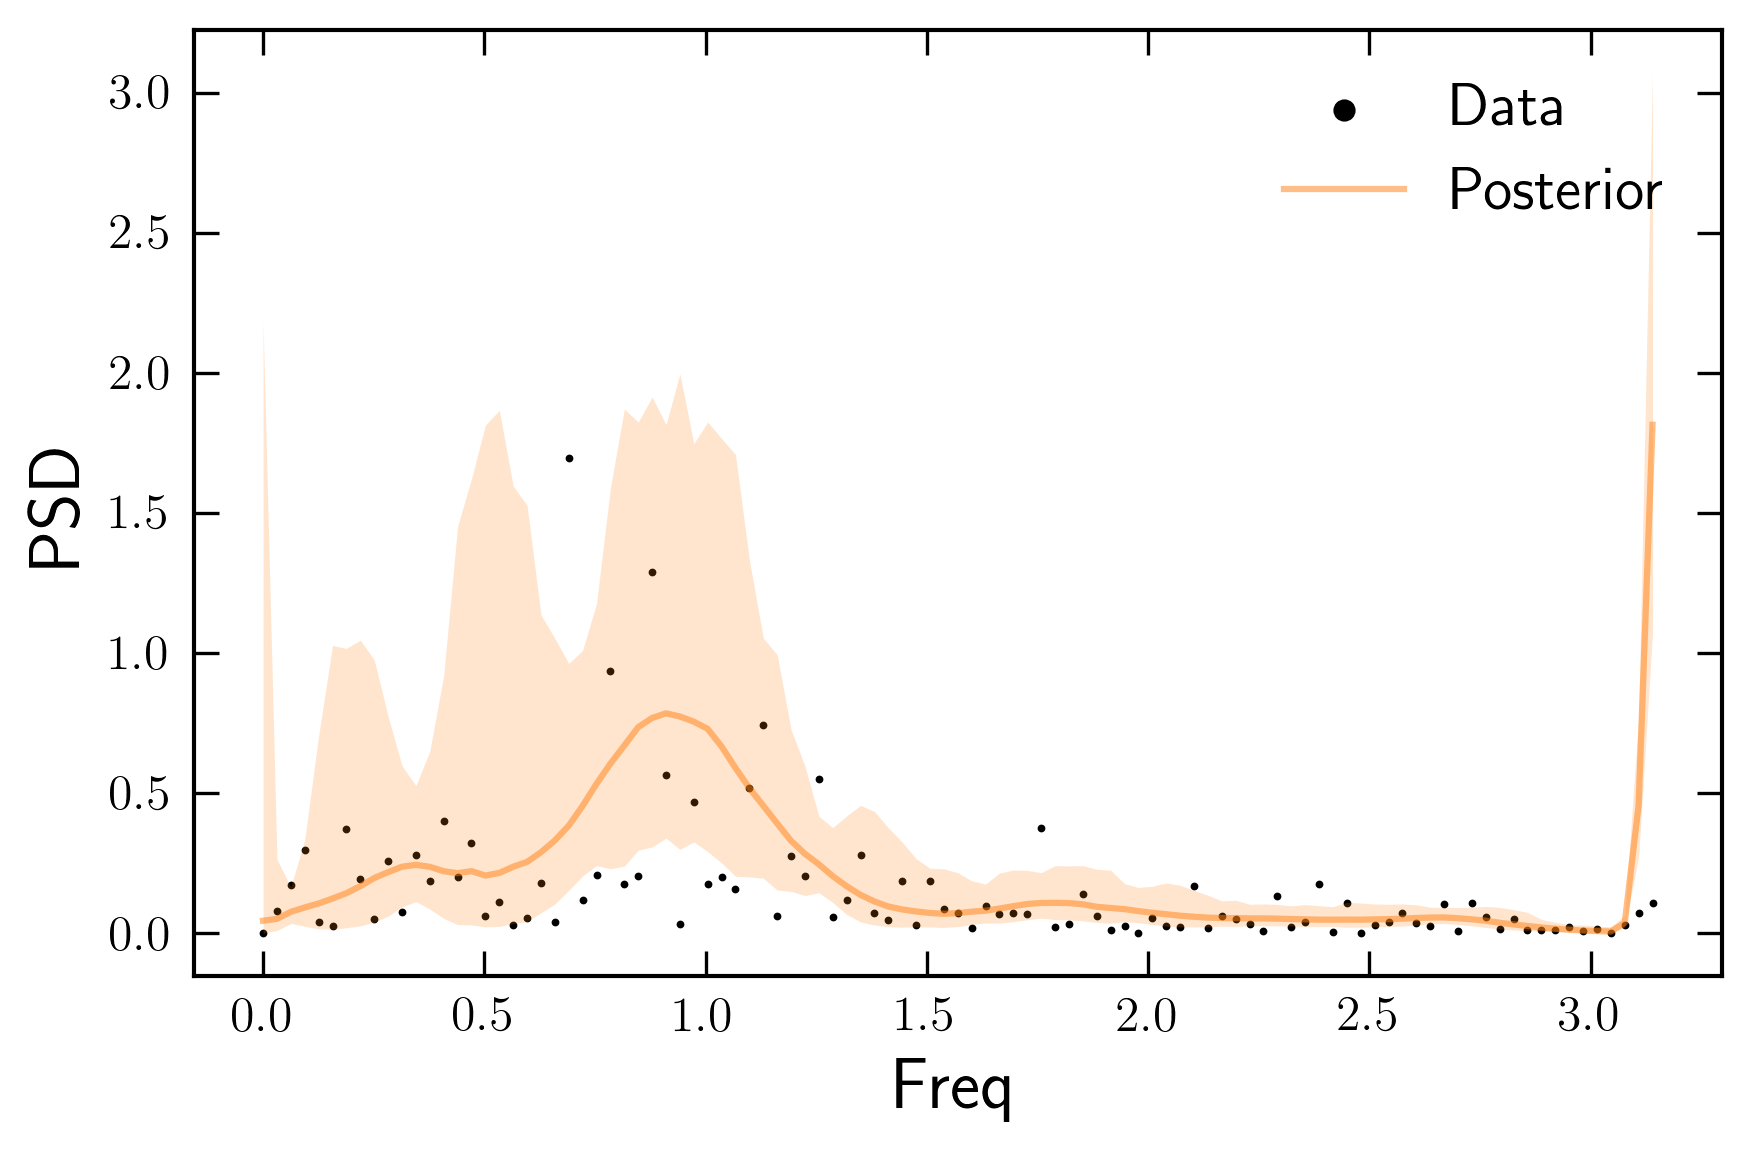

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft


def plot_psd(data, psd_quants):
    psd, psd_p05, psd_p95 = psd_quants[0, :], psd_quants[1, :], psd_quants[2, :]
    n, newn = len(data), len(psd)
    periodogram = np.abs(np.power(fft(data), 2) / (2 * np.pi * n))[0:newn]
    psd_x = np.linspace(0, 3.14, newn)
    fig = plt.plot(figsize=(3, 2))
    plt.scatter(psd_x, periodogram, color="k", label="Data", s=0.75)
    plt.plot(psd_x, psd, color="tab:orange", alpha=0.5, label="Posterior")
    plt.fill_between(
        psd_x, psd_p05, psd_p95, color="tab:orange", alpha=0.2, linewidth=0.0
    )

    plt.grid(False)
    plt.legend(markerscale=5, frameon=False)
    plt.ylabel("PSD")
    plt.xlabel("Freq")
    plt.tight_layout()
    plt.minorticks_off()
    return fig


fig = plot_psd(data, mcmc.psd_quantiles)